In [19]:
import pandas as pd
df = pd.read_csv('../z20_data/drinks.csv')
df

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
...,...,...,...,...,...,...
188,Venezuela,333,100,3,7.7,SA
189,Vietnam,111,2,1,2.0,AS
190,Yemen,6,0,0,0.1,AS
191,Zambia,32,19,4,2.5,AF


In [20]:
df.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol', 'continent'],
      dtype='object')

In [21]:
# 대륙간 국가 갯수
df['continent'].value_counts()

continent
AF    53
EU    45
AS    44
OC    16
SA    12
Name: count, dtype: int64

In [22]:
# AF의 맥주 소비량
df[df['continent'] == 'AF']['beer_servings'].head()

2      25
4     217
18     34
22    173
26     25
Name: beer_servings, dtype: int64

In [23]:
# 대륙간 맥주 소비량
df.groupby('continent')['beer_servings'].sum()

continent
AF    3258
AS    1630
EU    8720
OC    1435
SA    2101
Name: beer_servings, dtype: int64

In [24]:
# 대륙간 평균 wine_serving 출력
df.groupby('continent')['wine_servings'].mean()

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
SA     62.416667
Name: wine_servings, dtype: float64

In [25]:
# 상관관계 함수
corr = df[['beer_servings','wine_servings']].corr(method='pearson')
corr

,beer_servings,wine_servings
beer_servings,1.000000,0.527172
wine_servings,0.527172,1.000000


In [26]:
# 4개 모두다 상관관계, 형렬구현
cols = ['beer_servings','wine_servings','spirit_servings','total_litres_of_pure_alcohol']
df[cols].corr(method='pearson')

,beer_servings,wine_servings,spirit_servings,total_litres_of_pure_alcohol
beer_servings,1.000000,0.527172,0.458819,0.835839
wine_servings,0.527172,1.000000,0.194797,0.667598
spirit_servings,0.458819,0.194797,1.000000,0.654968
total_litres_of_pure_alcohol,0.835839,0.667598,0.654968,1.000000


In [27]:
# 대륙별 맥주소비량, 평균, 최소, 최대 , 합계
df.groupby('continent')['beer_servings'].mean()
df.groupby('continent')['beer_servings'].min()
df.groupby('continent')['beer_servings'].max()
df.groupby('continent')['beer_servings'].sum()
# apply(): 함수호출 agg():그룹함수사용
df.groupby('continent').spirit_servings.agg('mean','max','min','sum')

continent
AF     16.339623
AS     60.840909
EU    132.555556
OC     58.437500
SA    114.750000
Name: spirit_servings, dtype: float64

In [28]:
#맥주소비량이 가장 높은 대륙
x = df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).index



In [29]:
y = df.groupby('continent')['beer_servings'].sum().sort_values(ascending=False).values

<BarContainer object of 5 artists>

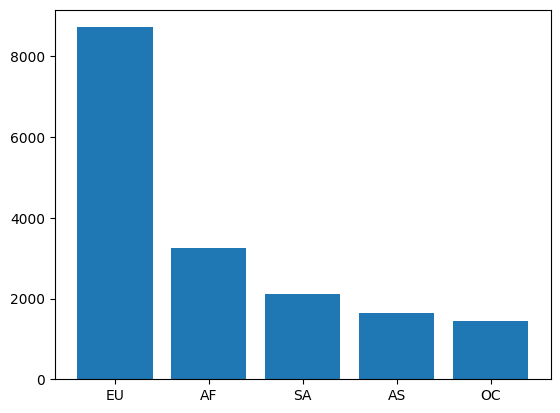

In [31]:
import matplotlib.pyplot as plt
# plt.plot(x,y)
plt.bar(x,y)